In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('suv_data - suv_data.csv')

In [3]:
X = df[['Age', 'EstimatedSalary']].values 
y = df['Purchased'].values

In [4]:
scaler = StandardScaler() 

In [5]:
X = scaler.fit_transform(X) 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=42) 

In [7]:
model = LogisticRegression().fit(X_train, y_train) 

In [8]:
accuracy = accuracy_score(y_test, model.predict(X_test)) 

In [9]:
print("Model Accuracy:", accuracy) 

Model Accuracy: 0.85


In [10]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 

In [11]:
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 

In [12]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [13]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 

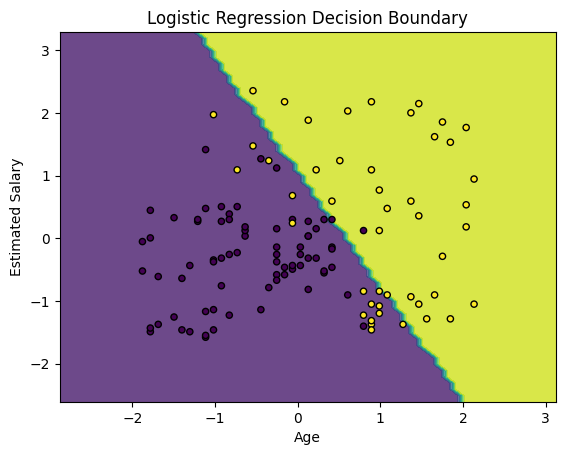

In [16]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=20)
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.title('Logistic Regression Decision Boundary') 
plt.show()